In [2]:
import pandas as pd
import numpy as np

In [3]:
! pwd

/Users/nengkuantu/CYCU/CYCU2022/ML/20221028/SolutionForLastHW


In [4]:
!  python --version

Python 3.7.3


# 1. Some subroutines

In [5]:
def get_bcw() :
    bcw = pd.read_csv('~/Downloads/wdbc.data' , header=None)
    column_names = ['id','malignant',
                'nucleus_mean','nucleus_se','nucleus_worst',
                'texture_mean','texture_se','texture_worst',
                'perimeter_mean','perimeter_se','perimeter_worst',
                'area_mean','area_se','area_worst',
                'smoothness_mean','smoothness_se','smoothness_worst',
                'compactness_mean','compactness_se','compactness_worst',
                'concavity_mean','concavity_se','concavity_worst',
                'concave_pts_mean','concave_pts_se','concave_pts_worst',
                'symmetry_mean','symmetry_se','symmetry_worst',
                'fractal_dim_mean','fractal_dim_se','fractal_dim_worst']

    bcw.columns = column_names
    
    bcw['malignant'] = bcw['malignant'].map(lambda x: 0 if x == "B" else 1)

    # make a copy for two purposes:
    # 1. keep the original data intake for futural reference.
    # 2. use the same dataset name "mydata" for later processing
    # so that we use the same code for different dataset.

    #     X = mydata[['nucleus_mean','texture_mean','perimeter_mean']]
    X = bcw.drop(columns=['id', 'malignant']).values

    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X = ss.fit_transform(X)
    
    
    y = bcw['malignant'].values
    return X, y

In [6]:
def evaluate(pred, expect) :
    ans = pred - expect
    error_sum = ans.sum()
    n_errors = abs(ans).sum()
    accuracy = 1 - n_errors / expect.shape[0]
    
    return round(accuracy, 3) , n_errors, error_sum

# 2. get dataset

In [7]:
X, y = get_bcw()   # X: feature vector, y label

In [8]:
y.sum()

212

In [9]:
y.shape

(569,)

In [10]:
212/569

0.37258347978910367

In [11]:
37/63

0.5873015873015873

In [12]:
X_orig = X
y_orig = y

bcw = pd.DataFrame(X)
bcw.columns = [
                'nucleus_mean','nucleus_se','nucleus_worst',
                'texture_mean','texture_se','texture_worst',
                'perimeter_mean','perimeter_se','perimeter_worst',
                'area_mean','area_se','area_worst',
                'smoothness_mean','smoothness_se','smoothness_worst',
                'compactness_mean','compactness_se','compactness_worst',
                'concavity_mean','concavity_se','concavity_worst',
                'concave_pts_mean','concave_pts_se','concave_pts_worst',
                'symmetry_mean','symmetry_se','symmetry_worst',
                'fractal_dim_mean','fractal_dim_se','fractal_dim_worst']
bcw['malignant'] = y

bcw.head()

,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,...,concave_pts_mean,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst,malignant
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [13]:
bcw.columns

Index(['nucleus_mean', 'nucleus_se', 'nucleus_worst', 'texture_mean',
       'texture_se', 'texture_worst', 'perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'area_mean', 'area_se', 'area_worst',
       'smoothness_mean', 'smoothness_se', 'smoothness_worst',
       'compactness_mean', 'compactness_se', 'compactness_worst',
       'concavity_mean', 'concavity_se', 'concavity_worst', 'concave_pts_mean',
       'concave_pts_se', 'concave_pts_worst', 'symmetry_mean', 'symmetry_se',
       'symmetry_worst', 'fractal_dim_mean', 'fractal_dim_se',
       'fractal_dim_worst', 'malignant'],
      dtype='object')

In [14]:
cols = bcw.columns
['malignant'] + list(cols[:-1])

['malignant',
 'nucleus_mean',
 'nucleus_se',
 'nucleus_worst',
 'texture_mean',
 'texture_se',
 'texture_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'area_mean',
 'area_se',
 'area_worst',
 'smoothness_mean',
 'smoothness_se',
 'smoothness_worst',
 'compactness_mean',
 'compactness_se',
 'compactness_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'concave_pts_mean',
 'concave_pts_se',
 'concave_pts_worst',
 'symmetry_mean',
 'symmetry_se',
 'symmetry_worst',
 'fractal_dim_mean',
 'fractal_dim_se',
 'fractal_dim_worst']

In [15]:
# try to move 'malignant' column to the front.
cols = bcw.columns
# print(['malignant'] + list(cols[:-1]))
bcw = bcw[['malignant'] + list(cols[:-1])]
bcw.head()

,malignant,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,...,concavity_worst,concave_pts_mean,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# 3. Split Data into Training and Testing
--------
Choose 3.1  and 3.2 to get the type of split data you want to train.

In [16]:
bcw.malignant.sum()

212

# 3.1 Original Data Split

In [17]:
from sklearn.model_selection import train_test_split

print(X.shape)
print(y.shape)
print(type(X))
print(type(y))
# numpy array does not have column names.  
# We can only use the slice [row_start:row_end:step_row, col_start:col_end:step_col]
# to select rows and cols we want
# be aware that row_end and col_end are not inclusive
# the format of the output will be discussed in another lecture.
print(X[0:6:2])
print(y[0:40:4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2018) 


(569, 30)
(569,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
   2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
   2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
   1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
   1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044  1.05292554
   1.36347845  2.03723076  0.93968482 -0.39800791  1.22867595 -0.78008338
   0.8509283   1.18133606 -0.29700501  0.8149735   0.21307643  1.42482747
   0.23703554  0.2935594   1.51187025 -0.02397438  1.34747521  1.45628455
   0.52740741  1.08293217  0.85497394  1.95500035  1.152255    0.20139121]
 [ 1.75029663 -1.15181643  1.77657315  1.82622928  0.28037183  0.53934045
   1.37101143  1.42849277 -0.00956047 -0.56244998  1.27054278 -0.7902437
   1.27318941  1.19035676  1.48306716 -0.04851

# 3.2 Data Split to Get Imbalanced Labels in Training Data

In [18]:
def GetImbalancedLabelData(DF_orig, label_ratio) :
    import copy as copy
    from sklearn.model_selection import train_test_split
    DF = copy.copy(DF_orig)
    DF1 = DF[DF.malignant == 1]
    DF0 = DF[DF.malignant == 0]
    
    Test_Size= 0.25  # intended test size.  The actual size depend on how the train data is arranged.
    # Simple implementation : 
    #      split both DF0 with Test_Size and DF1 with label_ratio 
    #      This method can not produce the right label_ratio for training set. 
#     TestSizeFrom0 =  Test_Size
    # instead , the following 2 statement, can split the training data in the precise label_ratio.
    max_train0_size = min(DF0.shape[0], DF1.shape[0])  
    TestSizeFrom0 = 1 -  min(max_train0_size, DF0.shape[0] * (1- Test_Size) ) / DF0.shape[0]
    
    
    DF0_train, DF0_test = train_test_split(DF0, test_size = TestSizeFrom0, random_state=2018)
    DF1_train, DF1_test = train_test_split(DF1, test_size =  (1 - label_ratio), random_state=2018)
    
    DF_train = pd.concat((DF0_train, DF1_train) )
    DF_test = pd.concat((DF0_test, DF1_test) )
    
    y_train = DF_train.malignant.values
    X_train = DF_train.drop(columns=[ 'malignant']).values
    y_test = DF_test.malignant.values
    X_test = DF_test.drop(columns=[ 'malignant']).values

    return X_train, X_test, y_train, y_test

In [19]:
X_train, X_test, y_train, y_test = GetImbalancedLabelData(bcw, 0.8)
print(y_train.sum(), y_train.shape,  y_test.sum(), y_test.shape,)
print(y_train.sum()/( y_train.shape[0] - y_train.sum() )  )

169 (381,) 43 (188,)
0.7971698113207547


# 4. Collect results with various labelratio

In [20]:
j = []

In [21]:
j = j + [  [1, 2, 3]  ]
j

[[1, 2, 3]]

In [22]:
j = j + [ [4, 5 ,6] ]
j

[[1, 2, 3], [4, 5, 6]]

In [23]:
def RunAll(bcw, label_ratio, default = 1) :
    
    # default: 1 for default class_weight (or default weights if KNN)
    # default: 0 forclass_weight = balanced (or weights = 'distance' if KNN)
    
    X_train, X_test, y_train, y_test = GetImbalancedLabelData(bcw, label_ratio)    
    LabelRatio = (y_train.sum() / ( y_train.shape[0] - y_train.sum()))
    
    results = []
    
    from sklearn.tree import DecisionTreeClassifier
    if default :
        DT = DecisionTreeClassifier()
    else:
        DT = DecisionTreeClassifier(class_weight='balanced') # default:None, other: balanced
    model = DT
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['DT', default, round(LabelRatio, 2) ] + list( evaluate(pred, y_test))]
    

    from sklearn.ensemble import RandomForestClassifier
    if default :
        RF = RandomForestClassifier(n_estimators =50)
    else:
        RF = RandomForestClassifier(n_estimators =50, class_weight='balanced') # default:None, other: balanced    
    model = RF
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['RF', default, round(LabelRatio, 2) ] + list( evaluate(pred, y_test))]
    
        
    from sklearn.neighbors import KNeighborsClassifier
    if default :
        KNN = KNeighborsClassifier()
    else:
        KNN = KNeighborsClassifier(weights = 'distance') # default:uniform, other: distance    
    model = KNN
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['KNN', default, round(LabelRatio, 2) ] + list( evaluate(pred, y_test))]
    
        
    from sklearn.svm import SVC
    if default :
        SVM = SVC(gamma='scale')
    else:
        SVM = SVC(gamma='scale', class_weight='balanced') # default:None, other: balanced
    model = SVM
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results = results + [['SVM', default, round(LabelRatio, 2) ] + list( evaluate(pred, y_test))]
    
    
    return results


In [24]:
RunAll(bcw, 0.6, default = 1)

[['DT', 1, 0.6, 0.922, 18, 2],
 ['RF', 1, 0.6, 0.957, 10, 0],
 ['KNN', 1, 0.6, 0.978, 5, -5],
 ['SVM', 1, 0.6, 0.961, 9, -1]]

In [25]:
RunAll(bcw, 0.6, default = 0)

[['DT', 0, 0.6, 0.926, 17, 1],
 ['RF', 0, 0.6, 0.957, 10, 0],
 ['KNN', 0, 0.6, 0.978, 5, -5],
 ['SVM', 0, 0.6, 0.965, 8, 0]]

In [26]:
Default = []
for i in range(10, 100) :
    labelratio = 0.01 * i  # i: 10--99, ---> 0.1 --0.99
    Default = Default + RunAll(bcw, labelratio, 1)
    
Default 

[['DT', 1, 0.1, 0.878, 41, -29],
 ['RF', 1, 0.1, 0.869, 44, -44],
 ['KNN', 1, 0.1, 0.818, 61, -61],
 ['SVM', 1, 0.1, 0.833, 56, -56],
 ['DT', 1, 0.11, 0.871, 43, -33],
 ['RF', 1, 0.11, 0.859, 47, -47],
 ['KNN', 1, 0.11, 0.823, 59, -59],
 ['SVM', 1, 0.11, 0.841, 53, -53],
 ['DT', 1, 0.12, 0.889, 37, -27],
 ['RF', 1, 0.12, 0.889, 37, -37],
 ['KNN', 1, 0.12, 0.837, 54, -54],
 ['SVM', 1, 0.12, 0.861, 46, -46],
 ['DT', 1, 0.13, 0.903, 32, -22],
 ['RF', 1, 0.13, 0.897, 34, -34],
 ['KNN', 1, 0.13, 0.842, 52, -52],
 ['SVM', 1, 0.13, 0.867, 44, -44],
 ['DT', 1, 0.14, 0.866, 44, -34],
 ['RF', 1, 0.14, 0.893, 35, -35],
 ['KNN', 1, 0.14, 0.848, 50, -50],
 ['SVM', 1, 0.14, 0.866, 44, -44],
 ['DT', 1, 0.15, 0.88, 39, -31],
 ['RF', 1, 0.15, 0.887, 37, -35],
 ['KNN', 1, 0.15, 0.85, 49, -49],
 ['SVM', 1, 0.15, 0.877, 40, -40],
 ['DT', 1, 0.16, 0.904, 31, -25],
 ['RF', 1, 0.16, 0.889, 36, -34],
 ['KNN', 1, 0.16, 0.849, 49, -49],
 ['SVM', 1, 0.16, 0.877, 40, -40],
 ['DT', 1, 0.17, 0.879, 39, -31],
 ['RF'

In [27]:
Weight = []
for i in range(10, 100) :
    labelratio = 0.01 * i  # i: 10--99, ---> 0.1 --0.99
    Weight = Weight + RunAll(bcw, labelratio, 0)
    
Weight

[['DT', 0, 0.1, 0.795, 69, -57],
 ['RF', 0, 0.1, 0.869, 44, -42],
 ['KNN', 0, 0.1, 0.818, 61, -61],
 ['SVM', 0, 0.1, 0.89, 37, -33],
 ['DT', 0, 0.11, 0.862, 46, -38],
 ['RF', 0, 0.11, 0.877, 41, -39],
 ['KNN', 0, 0.11, 0.823, 59, -59],
 ['SVM', 0, 0.11, 0.892, 36, -32],
 ['DT', 0, 0.12, 0.877, 41, -29],
 ['RF', 0, 0.12, 0.895, 35, -35],
 ['KNN', 0, 0.12, 0.837, 54, -54],
 ['SVM', 0, 0.12, 0.904, 32, -28],
 ['DT', 0, 0.13, 0.885, 38, -28],
 ['RF', 0, 0.13, 0.906, 31, -31],
 ['KNN', 0, 0.13, 0.842, 52, -52],
 ['SVM', 0, 0.13, 0.93, 23, -21],
 ['DT', 0, 0.14, 0.872, 42, -32],
 ['RF', 0, 0.14, 0.905, 31, -29],
 ['KNN', 0, 0.14, 0.848, 50, -50],
 ['SVM', 0, 0.14, 0.93, 23, -21],
 ['DT', 0, 0.15, 0.871, 42, -38],
 ['RF', 0, 0.15, 0.905, 31, -29],
 ['KNN', 0, 0.15, 0.85, 49, -49],
 ['SVM', 0, 0.15, 0.929, 23, -21],
 ['DT', 0, 0.16, 0.88, 39, -27],
 ['RF', 0, 0.16, 0.904, 31, -27],
 ['KNN', 0, 0.16, 0.849, 49, -49],
 ['SVM', 0, 0.16, 0.935, 21, -19],
 ['DT', 0, 0.17, 0.888, 36, -26],
 ['RF', 0

# 5. Get Some important statisticas  for various labelratio and models with groupby and other statistics

## 5.1  Convert previous results into DataFrame so that we can use powerful tools (including groupby) in DataFrame to do the analysis

In [28]:
DefaultDF = pd.DataFrame(Default, columns = ['Model', 'Weight',  'LabelRatio', 'Accuracy', 'N_errors', 'Bias'])
WeightDF = pd.DataFrame(Weight, columns = ['Model', 'Weight',  'LabelRatio', 'Accuracy', 'N_errors', 'Bias'])

In [29]:
DefaultDF.head()

,Model,Weight,LabelRatio,Accuracy,N_errors,Bias
0,DT,1,0.10,0.878,41,-29
1,RF,1,0.10,0.869,44,-44
2,KNN,1,0.10,0.818,61,-61
3,SVM,1,0.10,0.833,56,-56
4,DT,1,0.11,0.871,43,-33


In [30]:
WeightDF.head()

,Model,Weight,LabelRatio,Accuracy,N_errors,Bias
0,DT,0,0.10,0.795,69,-57
1,RF,0,0.10,0.869,44,-42
2,KNN,0,0.10,0.818,61,-61
3,SVM,0,0.10,0.890,37,-33
4,DT,0,0.11,0.862,46,-38


## 5.2  groupby and other statistics

In [31]:
DefaultDF.Bias.sum()

-3516

In [32]:
WeightDF.Bias.sum()

-3025

In [33]:
DefaultDF.describe()

,Weight,LabelRatio,Accuracy,N_errors,Bias
count,360.0,360.000000,360.000000,360.000000,360.000000
mean,1.0,0.545000,0.938639,16.394444,-9.766667
std,0.0,0.260153,0.036072,12.431874,14.849327
min,1.0,0.100000,0.818000,0.000000,-61.000000
25%,1.0,0.320000,0.913000,6.750000,-18.500000
50%,1.0,0.545000,0.943000,13.500000,-6.000000
75%,1.0,0.770000,0.965250,25.000000,1.000000
max,1.0,0.990000,1.000000,61.000000,13.000000


In [34]:
WeightDF.describe()

,Weight,LabelRatio,Accuracy,N_errors,Bias
count,360.0,360.000000,360.000000,360.000000,360.000000
mean,0.0,0.545000,0.941247,15.647222,-8.402778
std,0.0,0.260153,0.034434,11.871198,13.782492
min,0.0,0.100000,0.795000,0.000000,-61.000000
25%,0.0,0.320000,0.921000,6.000000,-17.000000
50%,0.0,0.545000,0.944000,13.000000,-3.000000
75%,0.0,0.770000,0.967000,21.000000,2.000000
max,0.0,0.990000,1.000000,69.000000,14.000000


In [35]:
DefaultDF[DefaultDF.LabelRatio > 0.7].describe()

,Weight,LabelRatio,Accuracy,N_errors,Bias
count,116.0,116.000000,116.000000,116.000000,116.000000
mean,1.0,0.850000,0.964362,6.387931,3.750000
std,0.0,0.084029,0.026428,4.907442,3.817295
min,1.0,0.710000,0.893000,0.000000,-3.000000
25%,1.0,0.780000,0.953250,3.750000,1.000000
50%,1.0,0.850000,0.969000,5.000000,4.000000
75%,1.0,0.920000,0.979750,9.000000,6.000000
max,1.0,0.990000,1.000000,22.000000,13.000000


In [36]:
WeightDF[WeightDF.LabelRatio > 0.7].describe()

,Weight,LabelRatio,Accuracy,N_errors,Bias
count,116.0,116.000000,116.000000,116.000000,116.000000
mean,0.0,0.850000,0.966517,5.974138,3.543103
std,0.0,0.084029,0.022624,4.123024,3.482608
min,0.0,0.710000,0.907000,0.000000,-3.000000
25%,0.0,0.780000,0.948500,3.750000,1.000000
50%,0.0,0.850000,0.970500,5.000000,4.000000
75%,0.0,0.920000,0.979750,9.000000,6.000000
max,0.0,0.990000,1.000000,18.000000,14.000000


In [37]:
DefaultDF[DefaultDF.LabelRatio < 0.5].describe()

,Weight,LabelRatio,Accuracy,N_errors,Bias
count,160.0,160.000000,160.000000,160.000000,160.000000
mean,1.0,0.295000,0.910925,26.887500,-22.937500
std,0.0,0.115796,0.029757,10.938356,12.298534
min,1.0,0.100000,0.818000,10.000000,-61.000000
25%,1.0,0.197500,0.896000,18.000000,-29.250000
50%,1.0,0.295000,0.911500,26.000000,-21.000000
75%,1.0,0.392500,0.932250,32.250000,-13.750000
max,1.0,0.490000,0.961000,61.000000,-6.000000


In [38]:
WeightDF[WeightDF.LabelRatio < 0.5].describe()

,Weight,LabelRatio,Accuracy,N_errors,Bias
count,160.0,160.000000,160.000000,160.000000,160.000000
mean,0.0,0.295000,0.915450,25.443750,-20.293750
std,0.0,0.115796,0.029999,10.781271,12.098442
min,0.0,0.100000,0.795000,11.000000,-61.000000
25%,0.0,0.197500,0.900750,18.000000,-27.000000
50%,0.0,0.295000,0.918500,23.000000,-18.000000
75%,0.0,0.392500,0.938000,31.000000,-12.000000
max,0.0,0.490000,0.959000,69.000000,-2.000000


In [39]:
DefaultDF[(DefaultDF.LabelRatio < 0.5) & (DefaultDF.LabelRatio > 0.2)].describe()

,Weight,LabelRatio,Accuracy,N_errors,Bias
count,116.0,116.000000,116.000000,116.000000,116.000000
mean,1.0,0.350000,0.924172,21.732759,-17.301724
std,0.0,0.084029,0.019181,6.470478,7.303626
min,1.0,0.210000,0.891000,10.000000,-33.000000
25%,1.0,0.280000,0.908000,17.000000,-23.000000
50%,1.0,0.350000,0.926000,22.000000,-17.000000
75%,1.0,0.420000,0.938250,27.000000,-11.000000
max,1.0,0.490000,0.961000,33.000000,-6.000000


In [40]:
WeightDF[(WeightDF.LabelRatio < 0.5) & (WeightDF.LabelRatio > 0.2)].describe()

,Weight,LabelRatio,Accuracy,N_errors,Bias
count,116.0,116.000000,116.000000,116.000000,116.000000
mean,0.0,0.350000,0.926078,21.146552,-15.370690
std,0.0,0.084029,0.020081,6.602048,7.856905
min,0.0,0.210000,0.868000,11.000000,-33.000000
25%,0.0,0.280000,0.909750,16.000000,-20.000000
50%,0.0,0.350000,0.924000,20.500000,-15.000000
75%,0.0,0.420000,0.944250,27.000000,-10.000000
max,0.0,0.490000,0.959000,41.000000,-2.000000


In [41]:
DefaultDF.groupby('Model').sum()

,Weight,LabelRatio,Accuracy,N_errors,Bias
Model,,,,,
DT,90,49.05,82.660,1845,-547
KNN,90,49.05,85.466,1321,-1309
RF,90,49.05,84.598,1428,-814
SVM,90,49.05,85.186,1308,-846


In [42]:
WeightDF.groupby('Model').sum()

,Weight,LabelRatio,Accuracy,N_errors,Bias
Model,,,,,
DT,0,49.05,82.731,1853,-539
KNN,0,49.05,85.466,1321,-1309
RF,0,49.05,84.434,1465,-769
SVM,0,49.05,86.218,994,-408


In [43]:
DefaultDF[DefaultDF.LabelRatio >  0.7].groupby('Model').sum()

,Weight,LabelRatio,Accuracy,N_errors,Bias
Model,,,,,
DT,29,24.65,26.849,385,245
KNN,29,24.65,28.826,33,-21
RF,29,24.65,27.983,181,123
SVM,29,24.65,28.208,142,88


In [44]:
DefaultDF[DefaultDF.LabelRatio < 0.5].groupby('Model').sum()

,Weight,LabelRatio,Accuracy,N_errors,Bias
Model,,,,,
DT,40,11.8,36.113,1160,-740
KNN,40,11.8,36.197,1157,-1157
RF,40,11.8,36.635,1010,-880
SVM,40,11.8,36.803,975,-893


In [45]:
WeightDF[WeightDF.LabelRatio < 0.5].groupby('Model').sum()

,Weight,LabelRatio,Accuracy,N_errors,Bias
Model,,,,,
DT,0,11.8,36.026,1193,-747
KNN,0,11.8,36.197,1157,-1157
RF,0,11.8,36.536,1033,-841
SVM,0,11.8,37.713,688,-502


In [46]:
DefaultDF.groupby(['Model', 'LabelRatio']).mean()

Weight  Accuracy  N_errors  Bias
Model LabelRatio                                  
DT    0.10             1     0.878        41   -29
      0.11             1     0.871        43   -33
      0.12             1     0.889        37   -27
      0.13             1     0.903        32   -22
      0.14             1     0.866        44   -34
      0.15             1     0.880        39   -31
      0.16             1     0.904        31   -25
      0.17             1     0.879        39   -31
      0.18             1     0.875        40   -28
      0.19             1     0.896        33   -23
      0.20             1     0.889        35   -23
      0.21             1     0.904        30   -18
      0.22             1     0.897        32   -20
      0.23             1     0.896        32   -20
      0.24             1     0.899        31   -21
      0.25             1     0.891        33   -25
      0.26             1     0.907        28   -14
      0.27             1     0.903        29   -17
      0.28             1     0.906        28   -16
      0.29             1     0.899        30   -18
      0.30             1     0.898        30   -22
      0.31             1     0.897        30   -18
      0.32             1     0.907        27   -17
      0.33             1     0.917        24   -12
      0.34             1     0.898        29   -23
      0.35             1     0.894        30   -18
      0.36             1     0.904        27   -15
      0.37             1     0.910        25   -17
      0.38             1     0.913        24   -20
      0.39             1     0.898        28   -12
...                  ...       ...       ...   ...
SVM   0.70             1     0.967         7     1
      0.71             1     0.966         7     1
      0.72             1     0.966         7     1
      0.73             1     0.966         7     1
      0.74             1     0.965         7     1
      0.75             1     0.965         7     1
      0.76             1     0.969         6     2
      0.77             1     0.969         6     2
      0.78             1     0.969         6     2
      0.79             1     0.974         5     1
      0.80             1     0.973         5     3
      0.81             1     0.973         5     3
      0.82             1     0.973         5     3
      0.83             1     0.973         5     3
      0.84             1     0.978         4     4
      0.85             1     0.977         4     4
      0.86             1     0.977         4     4
      0.87             1     0.977         4     4
      0.88             1     0.977         4     4
      0.89             1     0.976         4     4
      0.90             1     0.976         4     4
      0.91             1     0.976         4     4
      0.92             1     0.975         4     4
      0.93             1     0.975         4     4
      0.94             1     0.975         4     4
      0.95             1     0.974         4     4
      0.96             1     0.974         4     4
      0.97             1     0.974         4     4
      0.98             1     0.973         4     4
      0.99             1     0.973         4     4

[360 rows x 4 columns]

In [47]:
WeightDF.groupby(['Model', 'LabelRatio']).mean().iloc[-100:-1]

Weight  Accuracy  N_errors  Bias
Model LabelRatio                                  
RF    0.90             0     0.964         6     6
      0.91             0     0.970         5     5
      0.92             0     0.963         6     6
      0.93             0     0.956         7     7
      0.94             0     0.968         5     5
      0.95             0     0.968         5     5
      0.96             0     0.968         5     5
      0.97             0     0.961         6     6
      0.98             0     0.960         6     6
      0.99             0     0.966         5     5
SVM   0.10             0     0.890        37   -33
      0.11             0     0.892        36   -32
      0.12             0     0.904        32   -28
      0.13             0     0.930        23   -21
      0.14             0     0.930        23   -21
      0.15             0     0.929        23   -21
      0.16             0     0.935        21   -19
      0.17             0     0.935        21   -19
      0.18             0     0.934        21   -19
      0.19             0     0.937        20   -18
      0.20             0     0.940        19   -17
      0.21             0     0.939        19   -17
      0.22             0     0.939        19   -17
      0.23             0     0.939        19   -19
      0.24             0     0.938        19   -19
      0.25             0     0.938        19   -17
      0.26             0     0.940        18   -12
      0.27             0     0.943        17   -13
      0.28             0     0.946        16   -12
      0.29             0     0.946        16   -12
...                  ...       ...       ...   ...
      0.69             0     0.972         6     2
      0.70             0     0.971         6     2
      0.71             0     0.971         6     2
      0.72             0     0.971         6     2
      0.73             0     0.970         6     2
      0.74             0     0.970         6     2
      0.75             0     0.970         6     2
      0.76             0     0.974         5     3
      0.77             0     0.974         5     3
      0.78             0     0.974         5     3
      0.79             0     0.974         5     3
      0.80             0     0.973         5     3
      0.81             0     0.973         5     3
      0.82             0     0.973         5     3
      0.83             0     0.973         5     3
      0.84             0     0.978         4     4
      0.85             0     0.977         4     4
      0.86             0     0.977         4     4
      0.87             0     0.977         4     4
      0.88             0     0.977         4     4
      0.89             0     0.976         4     4
      0.90             0     0.976         4     4
      0.91             0     0.976         4     4
      0.92             0     0.975         4     4
      0.93             0     0.975         4     4
      0.94             0     0.975         4     4
      0.95             0     0.974         4     4
      0.96             0     0.974         4     4
      0.97             0     0.974         4     4
      0.98             0     0.973         4     4

[99 rows x 4 columns]

## 5.3 Graph

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

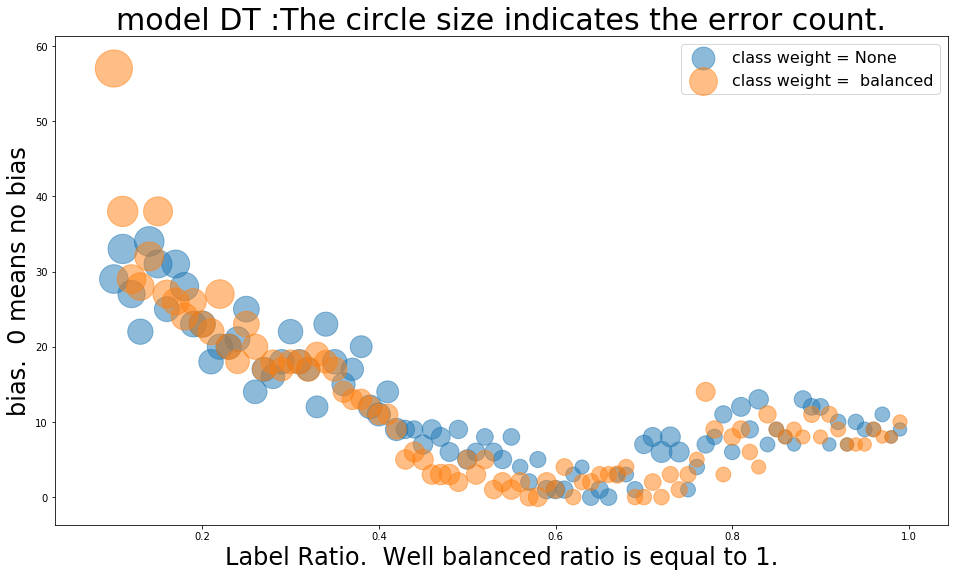

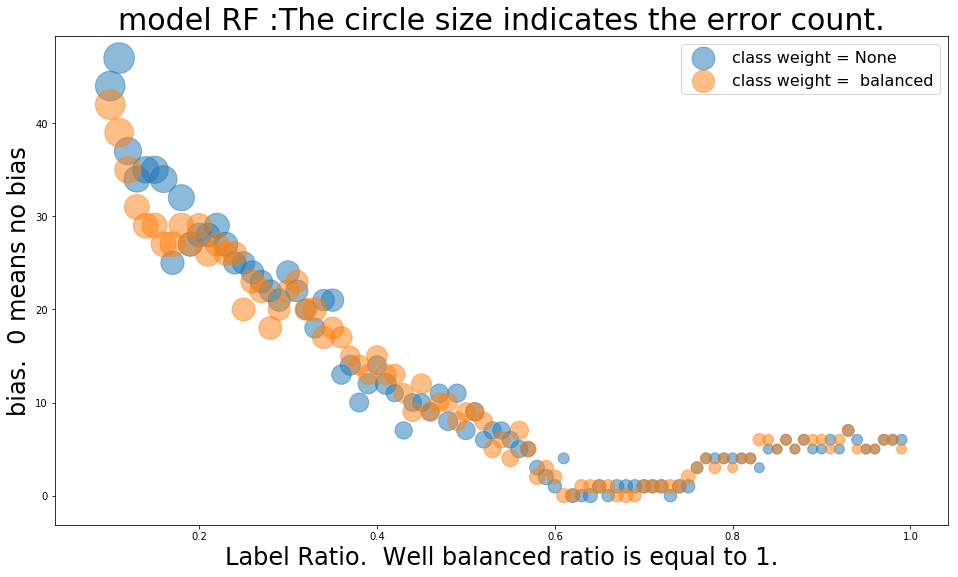

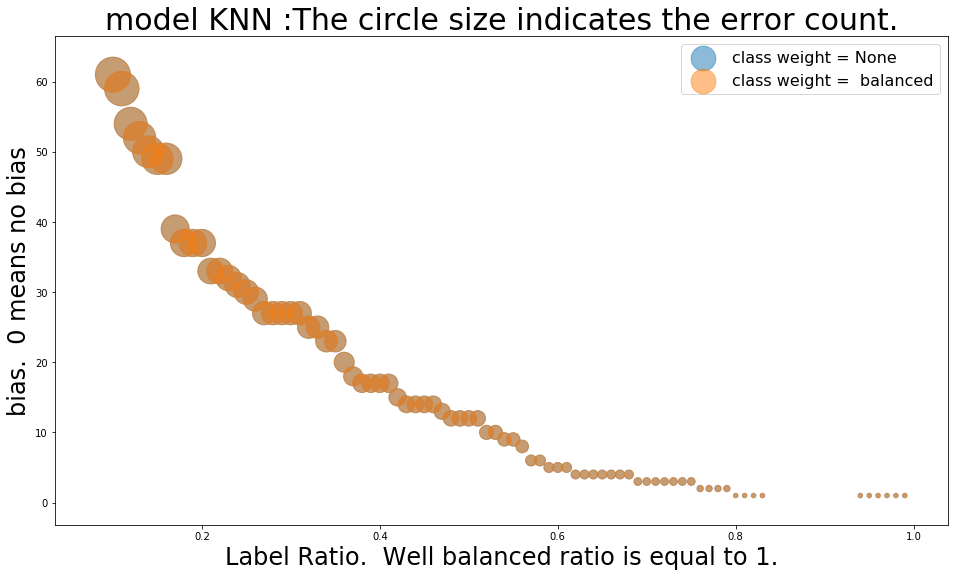

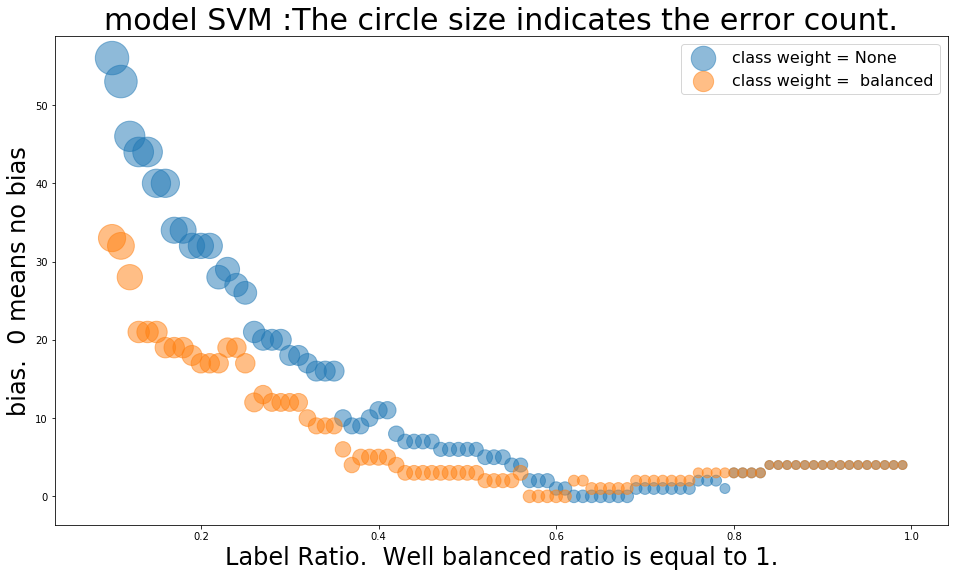

In [49]:
MarkerSizeScale = 20
Markersizearray =np.array([1, 2, 4, 8, 16, 32])
Y_Markersizearray = list(range(40, 24, -3))
for i in ['DT', 'RF', 'KNN', 'SVM' ]:
    plt.figure(figsize=(16,9))
    
    R1 = DefaultDF[DefaultDF.Model == i]
    plt.scatter(R1.LabelRatio, R1.Bias.abs(), s=R1.N_errors*MarkerSizeScale, alpha=0.5)
    
    R0 = WeightDF[WeightDF.Model == i]    
    plt.scatter(R0.LabelRatio, R0.Bias.abs(), s=R0.N_errors*MarkerSizeScale, alpha=0.5)
    
    plt.legend(['class weight = None', 'class weight =  balanced'], fontsize=16)
    
    
    plt.title('model ' + i + ' :The circle size indicates the error count.',  fontsize=30)
    plt.xlabel('Label Ratio.  Well balanced ratio is equal to 1.', fontsize=24)
    plt.ylabel('bias.  0 means no bias', fontsize=24)
    
    plt.show()
